In [1]:
import os
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.groundtruth_keypoint_dataset import GroundTruthKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path
pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/data/processed/synthetic_cabin_ir/Rear_Mirror')
annotation_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_knee=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/'

train_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)
val_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)
test_dataset = GroundTruthKeypointDataset(
    annotation_file=(annotation_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    exclude_ankle=True,
    exclude_knee=True,
    is_center_to_neck=True,
    is_normalize_to_bbox=False,
    is_normalize_to_pose=True,
    is_normalize_rotation=True
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)

model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)


if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 37499 val_dataset 6250 test_dataset 6251


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 793385.1318359375
activity_macro_mpjpe nan


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 2925 batches: 313.51583970408154
val MPJPE from: 6208 samples : 47.902997583150864
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #2
training loss from 2925 batches: 66.64350642735123
val MPJPE from: 6208 samples : 37.48513385653496
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #3
training loss from 2925 batches: 55.79720146635659
val MPJPE from: 6208 samples : 33.03283080458641
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #4
training loss from 2925 batches: 52.36697826630029
val MPJPE from: 6208 samples : 32.60010480880737
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #5
training loss from 2925 batches: 50.2255483977815
val MPJPE from: 6208 samples : 31.22125193476677
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #6
training loss from 2925 batches: 47.884467281082756
val MPJPE from: 6208 samples : 30.103355646133423
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #7
training loss from 2925 batches: 46.16440985447321
val MPJPE from: 6208 samples : 30.29022179543972
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #8
training loss from 2925 batches: 44.75797148978608
val MPJPE from: 6208 samples : 29.30532582104206
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #9
training loss from 2925 batches: 43.72973921079921
val MPJPE from: 6208 samples : 28.460389003157616
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #10
training loss from 2925 batches: 42.85398738888594
val MPJPE from: 6208 samples : 27.70012617111206
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #11
training loss from 2925 batches: 42.20565623579881
val MPJPE from: 6208 samples : 27.517372742295265
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #12
training loss from 2925 batches: 41.61647461418413
val MPJPE from: 6208 samples : 27.672020718455315
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #13
training loss from 2925 batches: 41.112722610561256
val MPJPE from: 6208 samples : 27.28145569562912
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #14
training loss from 2925 batches: 40.70552089402818
val MPJPE from: 6208 samples : 26.662519201636314
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #15
training loss from 2925 batches: 40.45176797697687
val MPJPE from: 6208 samples : 27.123574167490005
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #16
training loss from 2925 batches: 40.204092946826904
val MPJPE from: 6208 samples : 26.963641867041588
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #17
training loss from 2925 batches: 40.015124099122154
val MPJPE from: 6208 samples : 27.195461094379425
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #18
training loss from 2925 batches: 39.76100972065559
val MPJPE from: 6208 samples : 27.010109275579453
activity_macro_mpjpe nan


Validation: 0it [00:00, ?it/s]

check #19
training loss from 2925 batches: 39.65307136121978
val MPJPE from: 6208 samples : 26.776205748319626
activity_macro_mpjpe nan


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs/version_1/checkpoints/epoch=69-step=40950.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/Rear_Mirror/gt_2d/lightning_logs/version_1/checkpoints/epoch=69-step=40950.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 32.11263687263664
PJPE
                     PJPE
nose            22.452335
left_eye        22.511899
right_eye       23.616044
left_ear        21.046586
right_ear       20.425069
left_shoulder    9.385031
right_shoulder   9.384205
left_elbow      74.601555
right_elbow     49.441015
left_wrist      42.982408
right_wrist     59.646251
left_hip        29.776003
right_hip       32.195879
activities_mpjpe:
{}
test mpjpe: 32.11263687263664
activity_macro_mpjpe nan


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     32.11263687263664     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 32.11263687263664}]

In [3]:
trainer.model.test_history[0]['pjpe']

,PJPE
nose,22.452335
left_eye,22.511899
right_eye,23.616044
left_ear,21.046586
right_ear,20.425069
left_shoulder,9.385031
right_shoulder,9.384205
left_elbow,74.601555
right_elbow,49.441015
left_wrist,42.982408


In [4]:
trainer.model.test_history[0]['mpjpe']

32.11263687263664

[465.0, 328.0, 724.0, 722.0]
[483.0, 420.0, 730.0, 662.0]
[474.0, 212.0, 725.0, 645.0]


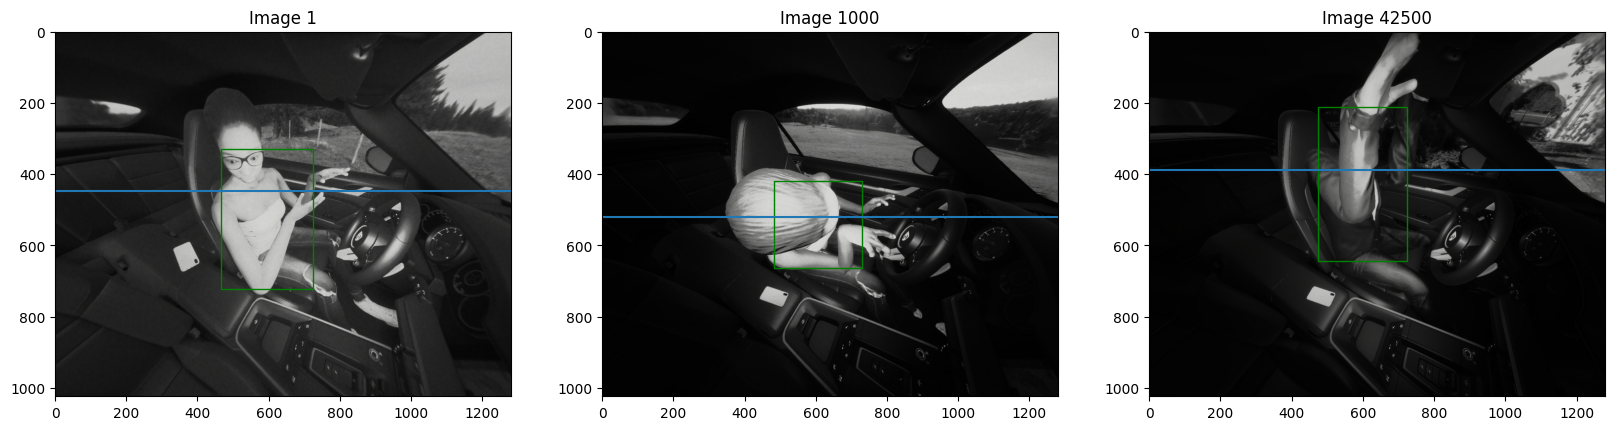

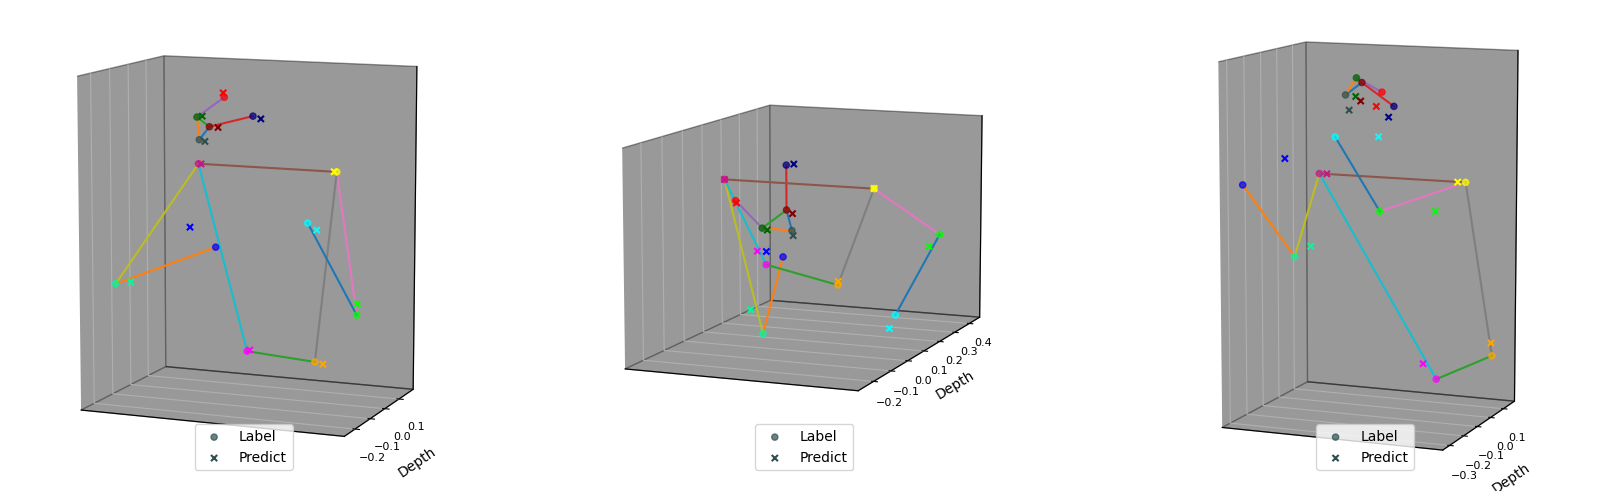

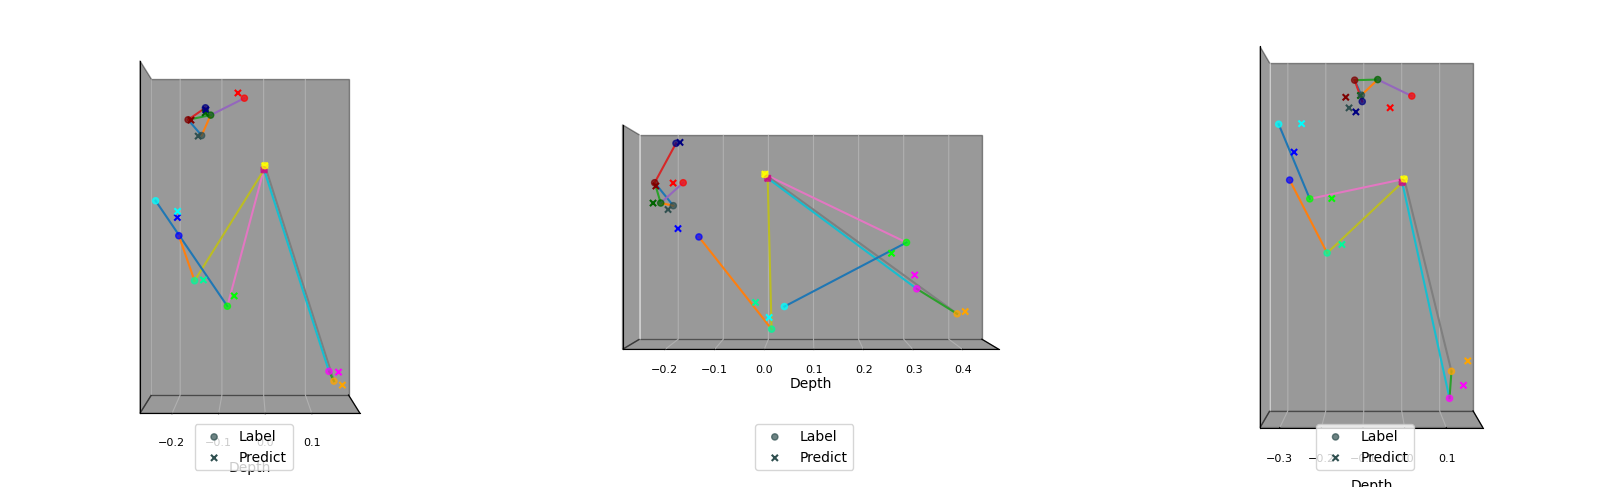

In [5]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    # img_width=image_width,
    # img_height=image_height,
    plot_figsize=(20.5, 10),
    sample_idices=[1, 1000, 5000]
)